In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Constants of Tantalum
rho = 16600
c = 147
k = 58.8
a = k/(rho*c)
d = 0.003
p = math.pi*d
Ac = math.pi*d*d*0.25
Fo = 0.5 # Stability criteria
del_x = 0.01  # change del_x to change number of nodes
mid_l = 0.06
nodes = int(mid_l/del_x)
del_t = (del_x*del_x)*(Fo/a)
I = 80
Re = 95*pow(10, -8)
e = 0.1
eqn_c = (I**2)*Re*(del_x**2)*(1/k)*(1/(Ac**2))*Fo
eqn_c1 = e*p*5.67*pow(10,-8)*(del_x**2)*(1/Ac)*(1/k)*Fo


In [ ]:
T_suc = []
j=0
T_prev = []
T = []
T_dist = []
time = []
for i in range(nodes+1):
  T_prev.append(300)
  T_suc.append(300)
  T.append(300)

T_dist.append(300)
for p in range(0,40):
  if(T_prev[0]>T[0]):
    j = p
  for i in range(nodes):
    T_prev[i] = T_suc[i]
    T_prev[i+1] = T_suc[i+1]
    if(i==0):
      T[i] = (Fo*(T_prev[i+1] + T_prev[i+1]) - eqn_c1*(T_prev[i]**4) + eqn_c)
      T_suc[i] = T[i]
      T_dist.append(T[i])
    else:
      T[i] = (Fo*(T_prev[i-1] + T_prev[i+1]) - eqn_c1*(T_prev[i]**4) + eqn_c)
      T_suc[i] = T[i]
  time.append(del_t*p)
time.append(del_t*(p+1))

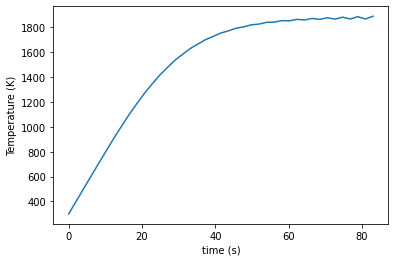

In [ ]:
plt.plot(time, T_dist)
plt.xlabel('time (s)')
plt.ylabel('Temperature (K)')
plt.show()